<a href="https://colab.research.google.com/github/95ImadEL/Tensorflow-basics/blob/main/CNN_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-18 13:03:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.28.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   124MB/s    in 0.8s    

2023-01-18 13:03:53 (124 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img


Image shape: (512, 512, 3)


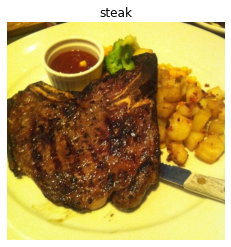

In [9]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224,224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               )

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,  # can also be (3, 3)
                           activation="relu",
                           input_shape=(224,224,3)), # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"), # pool_size can also be (2, 2) # padding can also be 'same'
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output   
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 222ms/step - loss: 0.5649 - accuracy: 0.6967 - val_loss: 0.5899 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4713 - accuracy: 0.7733 - val_loss: 0.3685 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3962 - accuracy: 0.8220 - val_loss: 0.3395 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3600 - accuracy: 0.8447 - val_loss: 0.3044 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3382 - accuracy: 0.8647 - val_loss: 0.2901 - val_accuracy: 0.9000


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [12]:
# Set the seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 1.2091 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Set the seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 4.3211 - accuracy: 0.6173 - val_loss: 0.9489 - val_accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.8316 - accuracy: 0.7080 - val_loss: 0.8769 - val_accuracy: 0.6680
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 1.0698 - accuracy: 0.6707 - val_loss: 0.6224 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.5012 - accuracy: 0.7780 - val_loss: 0.4629 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.5681 - accuracy: 0.7640 - val_loss: 0.4541 - val_accuracy: 0.7880


In [15]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


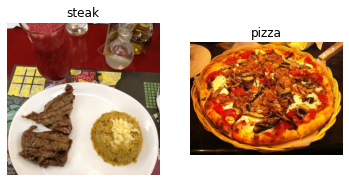

In [17]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/","pizza")

In [18]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [20]:
# Create train and test data generators and rescale the data 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:
# Turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [24]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.5411765 , 0.54901963, 0.5294118 ],
          [0.54901963, 0.5568628 , 0.5372549 ],
          [0.5529412 , 0.56078434, 0.5411765 ],
          ...,
          [0.4431373 , 0.5019608 , 0.5137255 ],
          [0.5803922 , 0.61960787, 0.6156863 ],
          [0.62352943, 0.6313726 , 0.61960787]],
 
         [[0.5647059 , 0.5764706 , 0.54901963],
          [0.5686275 , 0.5803922 , 0.5529412 ],
          [0.5647059 , 0.57254905, 0.5529412 ],
          ...,
          [0.41960788, 0.46274513, 0.48627454],
          [0.5019608 , 0.53333336, 0.5411765 ],
          [0.5529412 , 0.56078434, 0.5568628 ]],
 
         [[0.56078434, 0.57254905, 0.5372549 ],
          [0.5686275 , 0.5803922 , 0.5529412 ],
          [0.56078434, 0.57254905, 0.54509807],
          ...,
          [0.37254903, 0.39607847, 0.4431373 ],
          [0.43529415, 0.454902  , 0.4784314 ],
          [0.52156866, 0.5254902 , 0.5411765 ]],
 
         ...,
 
         [[0.3529412 , 0.23137257, 0.16078432],
          [0.34509

In [25]:
# View the first batch of labels
labels

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
      dtype=float32)

In [26]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [29]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Check lengths of training and test data generators
len(train_data),len(test_data)

(47, 16)

In [34]:
# Fit the model

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 0.9654 - accuracy: 0.7207 - val_loss: 0.4083 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4130 - accuracy: 0.8233 - val_loss: 0.4072 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.2787 - accuracy: 0.8967 - val_loss: 0.4232 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.1496 - accuracy: 0.9533 - val_loss: 0.4998 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.0686 - accuracy: 0.9827 - val_loss: 0.5531 - val_accuracy: 0.8080


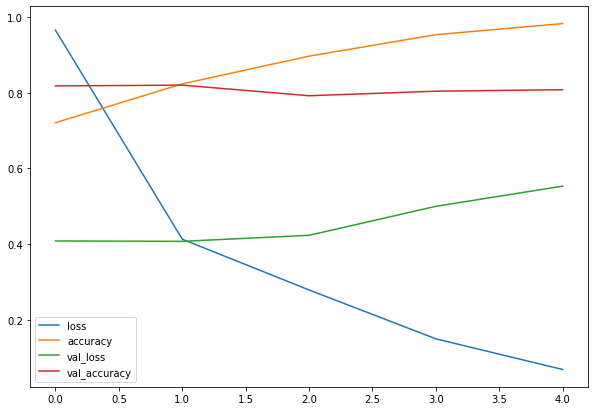

In [36]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7)); # Model is overfitting

In [37]:
# Plot the validation and training data separately

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend();

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

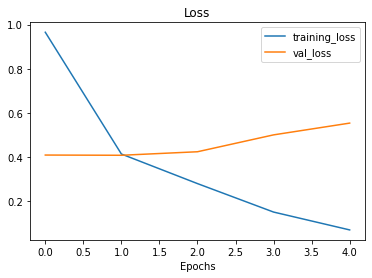

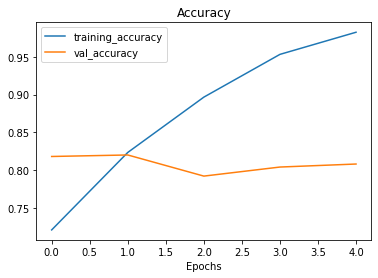

In [38]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [94]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)

model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), # input layer (specify input shape)
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [95]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [96]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 10s 206ms/step - loss: 0.8089 - accuracy: 0.5293 - val_loss: 0.6749 - val_accuracy: 0.5640
Epoch 2/10
47/47 [==============================] - 8s 175ms/step - loss: 0.6729 - accuracy: 0.5887 - val_loss: 0.6040 - val_accuracy: 0.7440
Epoch 3/10
47/47 [==============================] - 8s 175ms/step - loss: 0.9896 - accuracy: 0.6280 - val_loss: 0.6186 - val_accuracy: 0.6600
Epoch 4/10
47/47 [==============================] - 8s 177ms/step - loss: 0.6938 - accuracy: 0.5733 - val_loss: 0.6886 - val_accuracy: 0.5460
Epoch 5/10
47/47 [==============================] - 8s 175ms/step - loss: 0.6879 - accuracy: 0.5953 - val_loss: 0.6651 - val_accuracy: 0.5720
Epoch 6/10
47/47 [==============================] - 8s 175ms/step - loss: 0.6639 - accuracy: 0.6487 - val_loss: 0.6294 - val_accuracy: 0.7160
Epoch 7/10
47/47 [==============================] - 8s 177ms/step - loss: 0.6013 - accuracy: 0.6973 - val_loss: 0.5234 - val_accuracy: 0.7920
Epoch

In [97]:
# Check out the model architecture
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 10)      

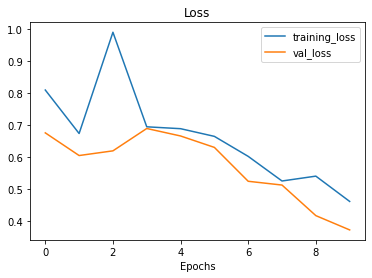

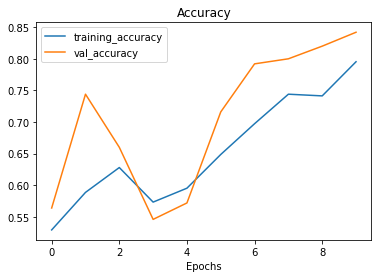

In [98]:
# Check out the loss curves of model_5
plot_loss_curves(history_5)

In [44]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [52]:
# Import data and augment it from training directory
print("Augmented training images:")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) 
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [53]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

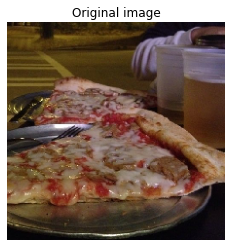

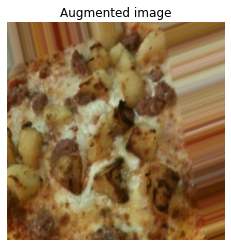

In [54]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [55]:
# Create the model (same as model_5)

model_6 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)), # input layer (specify input shape)
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 455ms/step - loss: 0.6515 - accuracy: 0.6173 - val_loss: 0.5313 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 23s 481ms/step - loss: 0.5269 - accuracy: 0.7500 - val_loss: 0.3720 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4954 - accuracy: 0.7713 - val_loss: 0.3406 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 21s 445ms/step - loss: 0.4695 - accuracy: 0.7780 - val_loss: 0.3905 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4618 - accuracy: 0.7893 - val_loss: 0.3162 - val_accuracy: 0.8660


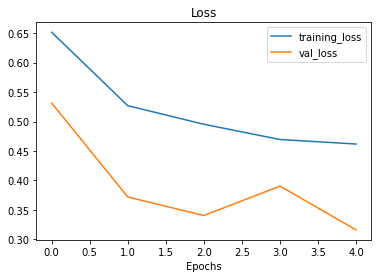

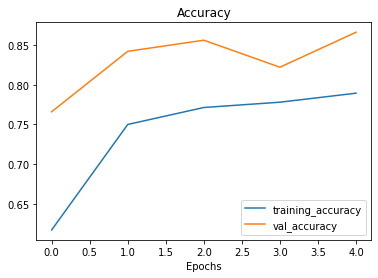

In [56]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [59]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_7 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)), # same input shape as our images
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 484ms/step - loss: 0.6302 - accuracy: 0.6573 - val_loss: 0.4751 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 26s 560ms/step - loss: 0.5268 - accuracy: 0.7513 - val_loss: 0.4126 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5152 - accuracy: 0.7587 - val_loss: 0.6636 - val_accuracy: 0.6660
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.5348 - accuracy: 0.7493 - val_loss: 0.4142 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4996 - accuracy: 0.7653 - val_loss: 0.3756 - val_accuracy: 0.8180


In [62]:
# Check model_7 architecture (same as model_1)
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

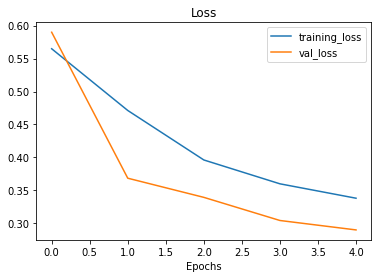

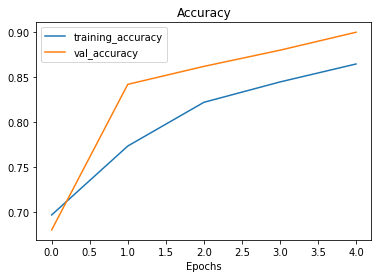

In [63]:
plot_loss_curves(history_1)

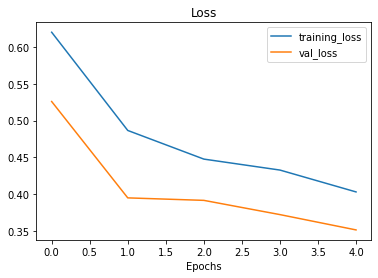

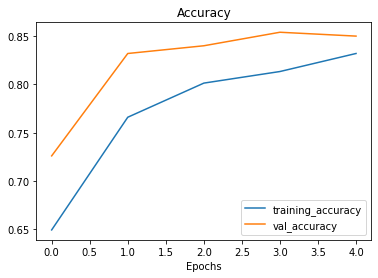

In [66]:
plot_loss_curves(history_5)

In [67]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-01-18 15:07:40--  https://raw.githubusercontent.com/95ImadEL/Tensorflow-basics/main/steak_test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114063 (111K) [image/jpeg]
Saving to: ‘steak_test.jpg’

steak_test.jpg      100%[===================>] 111.39K  --.-KB/s    in 0.02s   

2023-01-18 15:07:40 (5.27 MB/s) - ‘steak_test.jpg’ saved [114063/114063]



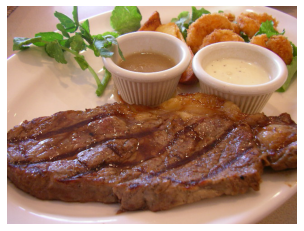

In [87]:
!wget https://raw.githubusercontent.com/95ImadEL/Tensorflow-basics/main/steak_test.jpg
steak = mpimg.imread("steak_test.jpg")
plt.imshow(steak)
plt.axis(False);

In [88]:
steak.shape

(480, 640, 3)

In [89]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels) 
  img = tf.image.decode_image(img, channels=3)
  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [90]:
# Load in and preprocess our custom image
steak = load_and_prep_image("steak_test.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.4084834 , 0.24545817, 0.17342936],
        [0.51860744, 0.35082033, 0.2112445 ],
        [0.4927171 , 0.30644256, 0.16962785],
        ...,
        [0.45906425, 0.318448  , 0.24561888],
        [0.44317737, 0.31580642, 0.23793527],
        [0.44441786, 0.3228492 , 0.24049631]],

       [[0.47054824, 0.3037615 , 0.22765106],
        [0.49459785, 0.31116447, 0.23057224],
        [0.45882353, 0.25994396, 0.18015206],
        ...,
        [0.46102488, 0.33161312, 0.25710332],
        [0.46470597, 0.33529422, 0.26638666],
        [0.459304  , 0.32989225, 0.2632256 ]],

       [[0.51980793, 0.35570228, 0.20944376],
        [0.4347339 , 0.24977992, 0.15490198],
        [0.48015204, 0.28015205, 0.21108446],
        ...,
        [0.46518636, 0.3357746 , 0.26126477],
        [0.47731104, 0.3478993 , 0.27450997],
        [0.48623514, 0.35682338, 0.2901567 ]],

       ...,

       [[0.8235294 , 0.7294118 , 0.78039217],
        [0.81

In [99]:
pred = model_5.predict(tf.expand_dims(
    steak, axis=0,
))

1/1 [==============================] - 0s 70ms/step


In [100]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [101]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [102]:
def pred_and_plot(model, filename, class_names):

  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


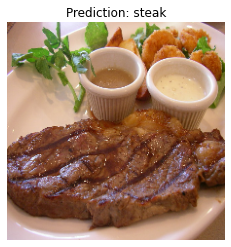

In [103]:
# Test our model on a custom image
pred_and_plot(model_5, "steak_test.jpg", class_names)

--2023-01-18 15:18:27--  https://raw.githubusercontent.com/95ImadEL/Tensorflow-basics/main/pizza_test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 928918 (907K) [image/jpeg]
Saving to: ‘pizza_test.jpg’

pizza_test.jpg      100%[===================>] 907.15K  --.-KB/s    in 0.05s   

2023-01-18 15:18:27 (19.2 MB/s) - ‘pizza_test.jpg’ saved [928918/928918]

1/1 [==============================] - 0s 17ms/step


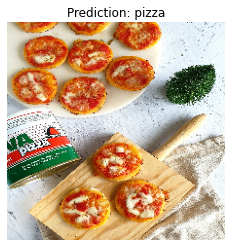

In [105]:
!wget https://raw.githubusercontent.com/95ImadEL/Tensorflow-basics/main/pizza_test.jpg

# Download another test image and make a prediction on it
pred_and_plot(model_5, "pizza_test.jpg", class_names)